# Simulation of standard Snakes and ladders Game
## This program is used to simulate snakes and ladder game to find the average length of the game
** Author: Edwin Ismail **

In [1]:
import random
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# initializing size of the dance
dice = 6
countlist = []

*** snakes and ladders for the game for a snake element [[0]] < element [[1]] and for a ladder element [[0]] < element [[1]] ***

In [2]:
snakes_ladders = [[1, 38], [4, 14], [9, 31], [21, 42], [28, 84], [36, 44], [51, 67], [71, 91], [80, 100], [16, 6], [47, 26], [49, 11], [56, 53], [62, 19],
                  [64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]


*** Function for the simulation of the game snakes and ladders ***


In [3]:
def gamesimulation(sl, dice):
    # initialization of parameters count for counting the length of game, path records the step of the game to  completion, token is actual element moving through the game
    count = 0
    path = []
    token = 0
    while token < 100:
        roll = random.randint(1, dice)
        token = token+roll
        count += 1
        if token > 100:
            token = token-roll
        for trans in sl:
            if token == trans[0]:
                token = trans[1]
                break
        path.append(token)
    return [count, path]

*** Function for commanding how many times the game should be played ***


In [4]:
def NumberOfGame(number):
    for num in range(0, number):
        countlist.append(gamesimulation(snakes_ladders, dice))
    return countlist

*** Function is to presenting the result of the game ***

In [5]:
def results(countlist):
    print("The minimum lenght of the game is {} \n the shortest path is {}".format(
        (min(countlist))[0], (min(countlist))[1]))
    print("The maximum lenght of the game is {} \n the longest path is {}".format(
        (max(countlist))[0], (max(countlist))[1]))
    sums = 0
    for ele in countlist:
        sums += ele[0]
    print("Average length of the game is {}".format(sums/len(countlist)))

In [6]:
#playing 100000 games
results(NumberOfGame(100000))

The minimum lenght of the game is 7 
 the shortest path is [14, 17, 22, 84, 89, 75, 100]
The maximum lenght of the game is 290 
 the longest path is [2, 14, 17, 22, 27, 33, 35, 37, 43, 44, 45, 50, 55, 57, 58, 19, 42, 26, 30, 32, 33, 37, 43, 45, 46, 52, 55, 59, 60, 65, 66, 70, 76, 82, 83, 84, 24, 27, 32, 33, 34, 44, 11, 14, 17, 42, 45, 11, 6, 10, 6, 12, 18, 24, 25, 27, 32, 33, 38, 44, 50, 53, 55, 59, 60, 61, 66, 68, 69, 74, 76, 81, 86, 24, 29, 34, 44, 45, 46, 11, 14, 20, 26, 30, 34, 40, 42, 26, 29, 35, 40, 41, 44, 50, 55, 58, 19, 20, 26, 27, 31, 32, 44, 11, 12, 6, 11, 15, 20, 23, 25, 26, 31, 32, 38, 39, 43, 48, 50, 52, 53, 57, 19, 24, 26, 31, 37, 42, 26, 30, 34, 44, 46, 11, 6, 31, 37, 43, 46, 50, 53, 59, 60, 65, 67, 70, 91, 73, 76, 77, 81, 84, 24, 84, 88, 89, 73, 77, 79, 85, 86, 89, 92, 97, 78, 81, 85, 88, 92, 73, 78, 83, 86, 24, 30, 33, 44, 45, 26, 27, 30, 32, 35, 37, 41, 26, 30, 35, 41, 46, 48, 11, 14, 15, 19, 23, 25, 31, 35, 41, 46, 67, 70, 91, 75, 76, 78, 81, 24, 30, 33, 44, 50, 67,

*** converting a list to numpy array for ease graph plotting ***

In [7]:
countlist=np.array(countlist)

In [8]:
#reshaping array to the shape (100000,)
countlist=countlist[:,:-1].reshape(100000,)

(0, 350)

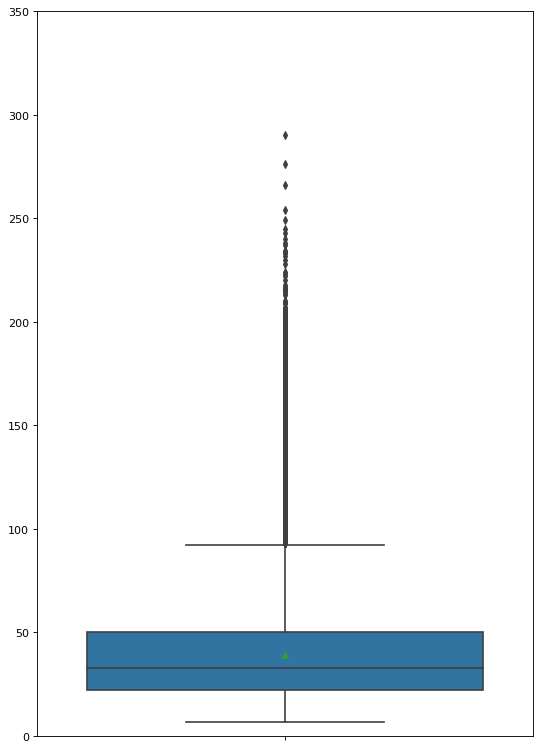

In [9]:
#plotbox 
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countlist,orient="v",showmeans=True)
plt.ylim(0,350)

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

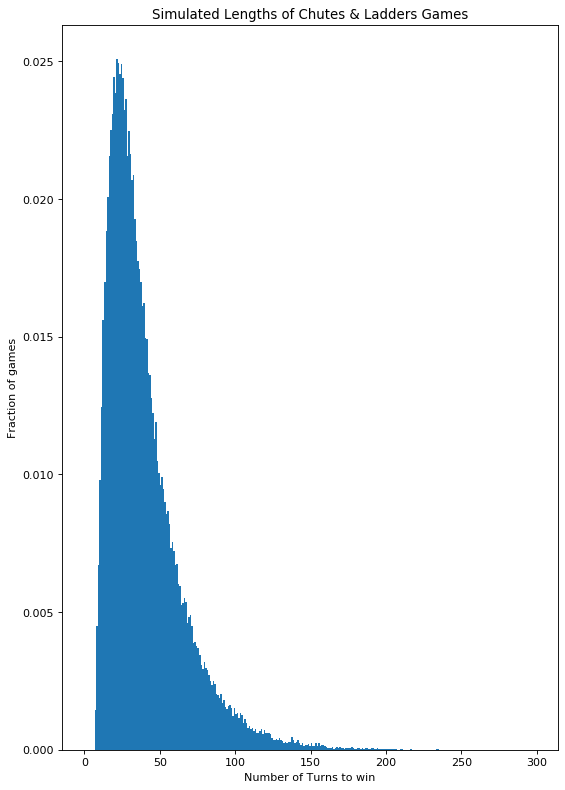

In [10]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countlist,bins=range(300),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')

In [11]:
df=pd.DataFrame(data=countlist,columns=["number of turns"])
df["number of turns"].value_counts()

21     2507
22     2494
24     2492
23     2456
19     2445
       ... 
214       1
213       1
276       1
207       1
290       1
Name: number of turns, Length: 228, dtype: int64